In [9]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(".")
sys.path.append("..")

from pathlib import Path
from src.datamodule.av2_dataset import Av2Dataset
from src.datamodule.av2_extractor import Av2Extractor
from src.datamodule.av2_dataset import collate_fn
from av2.datasets.motion_forecasting import scenario_serialization
from av2.map.map_api import ArgoverseStaticMap
from src.utils.vis import  visualize_scenario
from src.model.trainer_forecast import Trainer as Model
from av2.datasets.motion_forecasting.data_schema import (
    ArgoverseScenario,
    ObjectType,
    TrackCategory,
)
import matplotlib.pyplot as plt
import numpy as np

data_root = Path("/data/jerome.zhou/prediction_dataset/av2/val") # Path to the datase
dataset = Av2Dataset(data_root=data_root, extractor=Av2Extractor(radius=150))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Extracting data from /data/jerome.zhou/prediction_dataset/av2/val
data root: /data/jerome.zhou/prediction_dataset/av2/val/None, total number of files: 24988


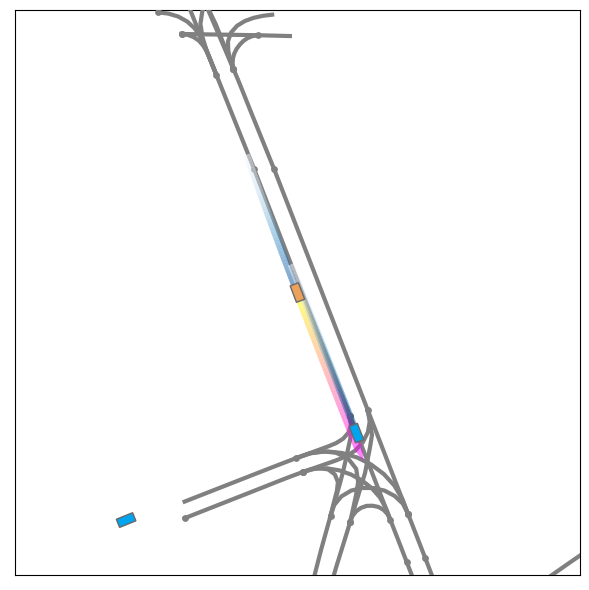

In [37]:
# use dataset get_data() api interface
data = dataset[16]
scene_id = data["scenario_id"]
scene_file = data_root / scene_id / ("scenario_" + scene_id + ".parquet")
map_file = data_root / scene_id / ("log_map_archive_" + scene_id + ".json")
scenario = scenario_serialization.load_argoverse_scenario_parquet(scene_file)
static_map = ArgoverseStaticMap.from_json(map_file)
# vis used paper method
visualize_scenario(scenario, static_map, transform=False)


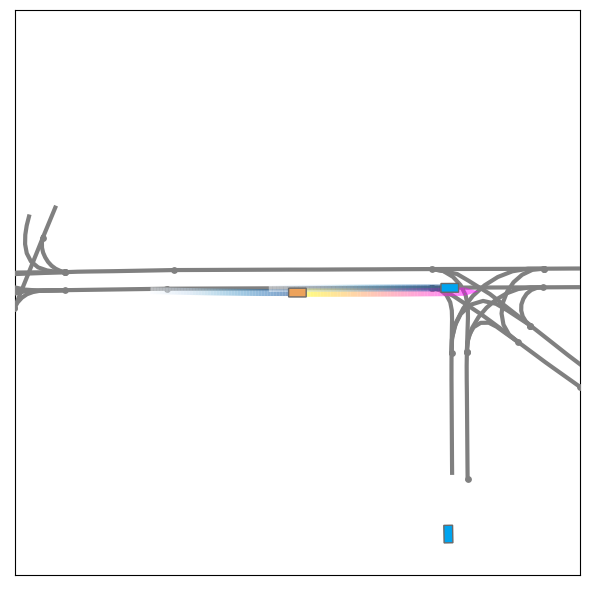

In [47]:
visualize_scenario(scenario, static_map)